___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

plt.rcParams["patch.force_edgecolor"] = True


## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [114]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [102]:
ad_data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


** Use info and describe() on ad_data**

In [116]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [115]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


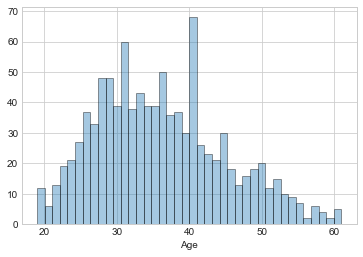

In [10]:
sns.distplot(ad_data['Age'], kde=False, bins=40)

In [11]:
ad_data['Age'].value_counts().head()

31    60
36    50
28    48
29    48
33    43
Name: Age, dtype: int64

**Create a jointplot showing Area Income versus Age.**

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


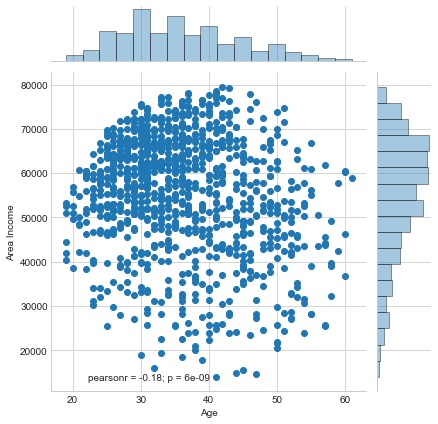

In [9]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

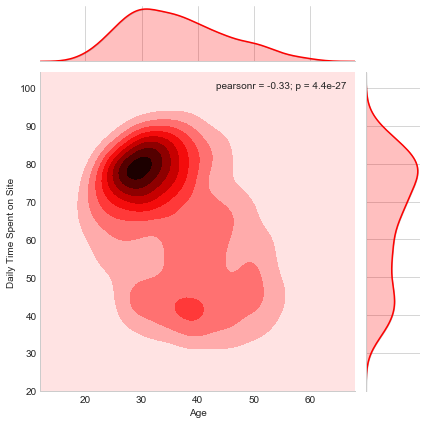

In [17]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', color='red')

In [33]:
ad_data[ad_data['Daily Time Spent on Site']==91.43]['Age']

533    39
Name: Age, dtype: int64

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


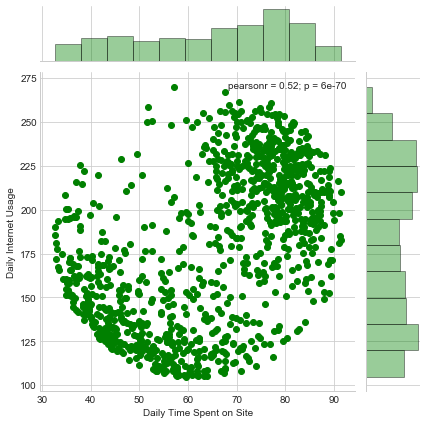

In [34]:
sns.jointplot(y='Daily Internet Usage', x='Daily Time Spent on Site', data=ad_data, color='green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

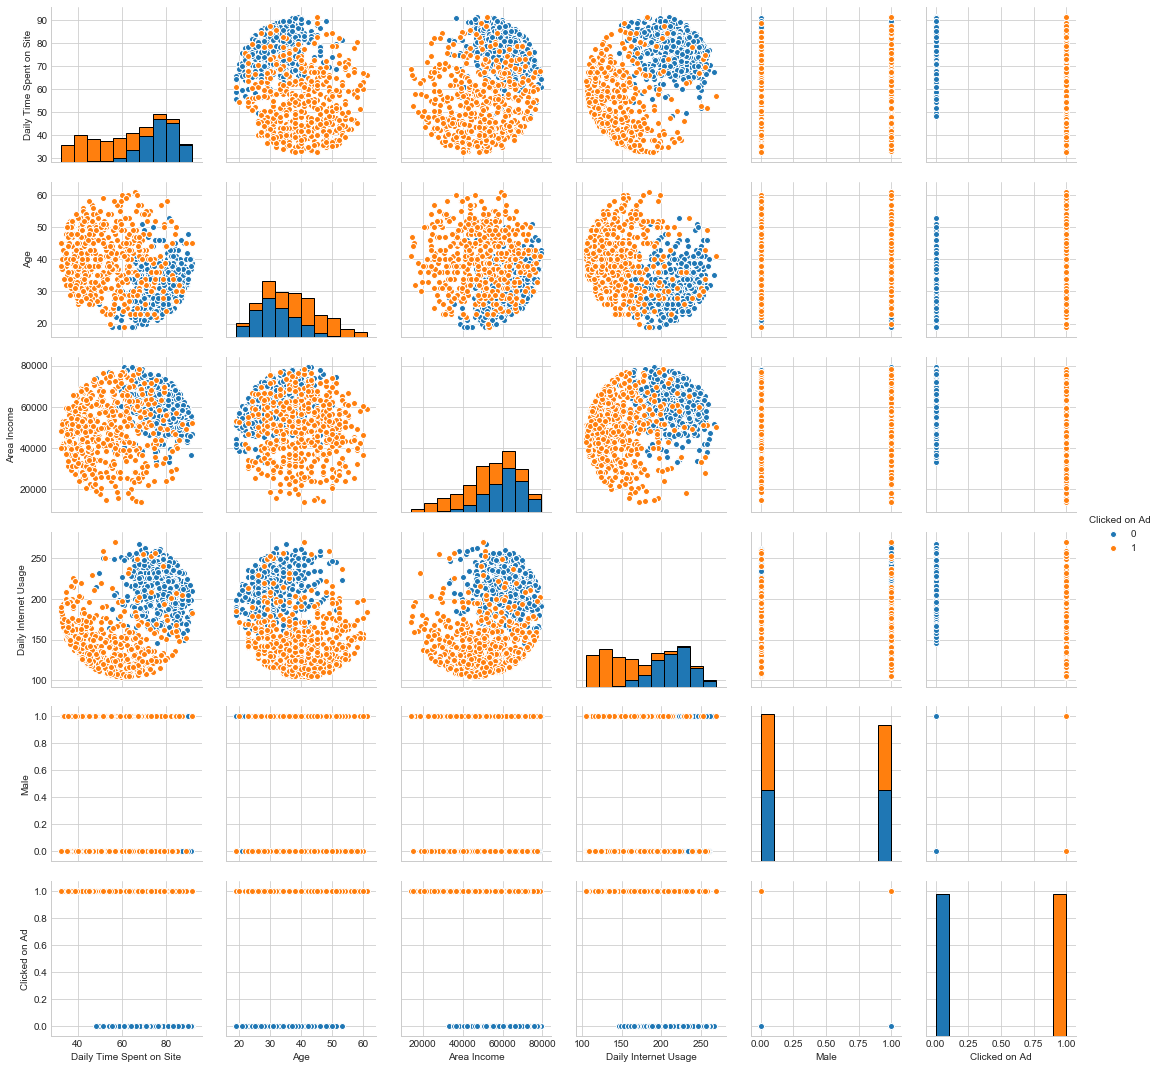

In [35]:
sns.pairplot(ad_data, hue='Clicked on Ad')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

In [117]:
isMale= pd.get_dummies(ad_data['Male'], drop_first=True)
isMale.columns = ['isMale']


In [118]:
clickedOnAd= pd.get_dummies(ad_data['Clicked on Ad'], drop_first=True)
clickedOnAd.columns=['ClickedOnAd']

In [119]:
ad_data=pd.concat([ad_data, isMale, clickedOnAd], axis=1)


In [120]:
ad_data=ad_data.drop(['Male', 'Clicked on Ad'], axis=1)


In [144]:
ad_data=ad_data.drop(['City', 'Ad Topic Line'], axis=1)


In [121]:
ad_data['Country'].value_counts().head()

France            9
Czech Republic    9
Micronesia        8
Peru              8
Turkey            8
Name: Country, dtype: int64

In [125]:
#ad_data=ad_data.drop('Timestamp', axis=1)
ad_data=ad_data.drop('Country', axis=1)

In [145]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,isMale,ClickedOnAd
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


** Split the data into training set and testing set using train_test_split**

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ad_data.iloc[:,0:5], ad_data.iloc[:,5], test_size= 0.3, random_state=101)

** Train and fit a logistic regression model on the training set.**

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
log_model= LogisticRegression()

In [150]:
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [151]:
y_pred = log_model.predict(X_test)

** Create a classification report for the model.**

In [152]:
from sklearn.metrics import confusion_matrix, classification_report

In [156]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300



In [157]:
print(confusion_matrix(y_test, y_pred))

[[149   8]
 [ 15 128]]
